In [1]:
import pandas as pd
import os
import time
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.path.abspath("lab-customer-analysis-round-2/marketing_customer_analysis.csv")
df = pd.read_csv('/Users/javiercorderopariente/dataexercises/lab-customer-analysis-round-2/marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
#shape
shape = df.shape
shape

(9134, 24)

In [4]:
#standardize header names
df.columns
df = df.rename(columns= {"EmploymentStatus":"Employment Status"})
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'Employment Status', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
df = df.set_index('Customer')
df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [46]:
for column in df.select_dtypes(np.object):
    print(df[column].value_counts())

In [6]:
#categirical/numerical
df.dtypes

State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
Employment Status                 object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [26]:
#checking and counting NaNs
df.isna().values.any()
df.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
Employment Status                0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Month                            0
dtype: int64

In [8]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])
df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


In [ ]:
#Extracting the Month
#months = df['Effective To Date'].month
#df["months"] = months
df['Month'] = df['Effective To Date'].dt.month
df

In [10]:
#filtering by month and quarter
first_q = df[df['Month'].between(1, 4)]
first_q


,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2


In [11]:
#describing data
df.describe().T
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State                          9134 non-null   object        
 1   Customer Lifetime Value        9134 non-null   float64       
 2   Response                       9134 non-null   object        
 3   Coverage                       9134 non-null   object        
 4   Education                      9134 non-null   object        
 5   Effective To Date              9134 non-null   datetime64[ns]
 6   Employment Status              9134 non-null   object        
 7   Gender                         9134 non-null   object        
 8   Income                         9134 non-null   int64         
 9   Location Code                  9134 non-null   object        
 10  Marital Status                 9134 non-null   object        
 11  Monthly Premi

In [12]:
cat = df.select_dtypes('object')
cat

,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [13]:
for column in cat.columns:
    print(column, cat[column].unique())

State ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Response ['No' 'Yes']
Coverage ['Basic' 'Extended' 'Premium']
Education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Employment Status ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Gender ['F' 'M']
Location Code ['Suburban' 'Rural' 'Urban']
Marital Status ['Married' 'Single' 'Divorced']
Policy Type ['Corporate Auto' 'Personal Auto' 'Special Auto']
Policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Renew Offer Type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
Sales Channel ['Agent' 'Call Center' 'Web' 'Branch']
Vehicle Class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
Vehicle Size ['Medsize' 'Small' 'Large']


In [14]:
df.describe().apply(lambda x: round(x,2))
df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2


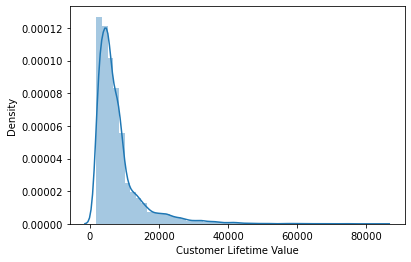

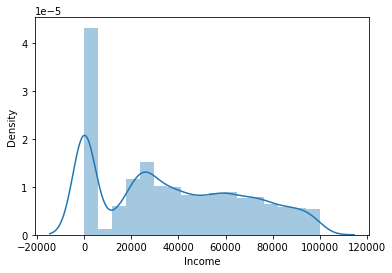

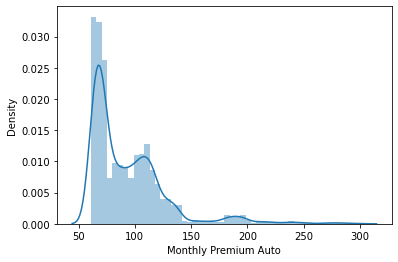

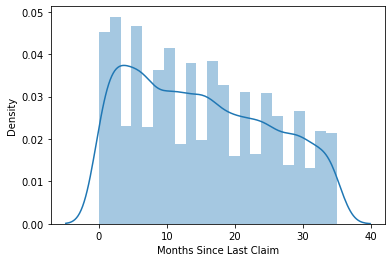

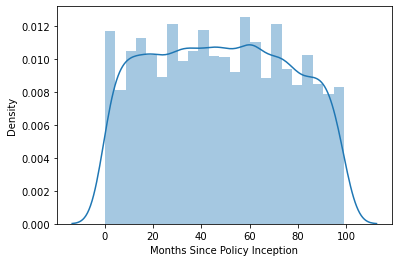

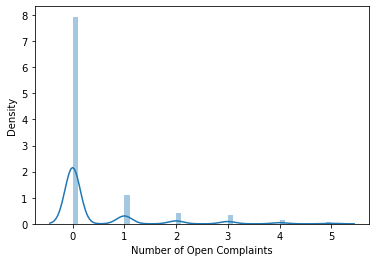

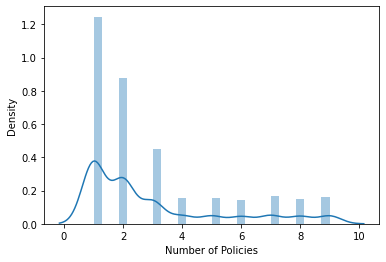

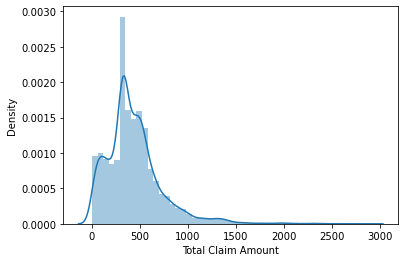

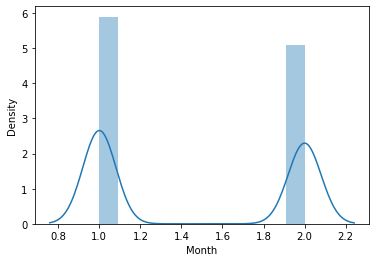

In [15]:
for column in df.select_dtypes(np.number).columns:
    sns.distplot(df[column])
    plt.show()

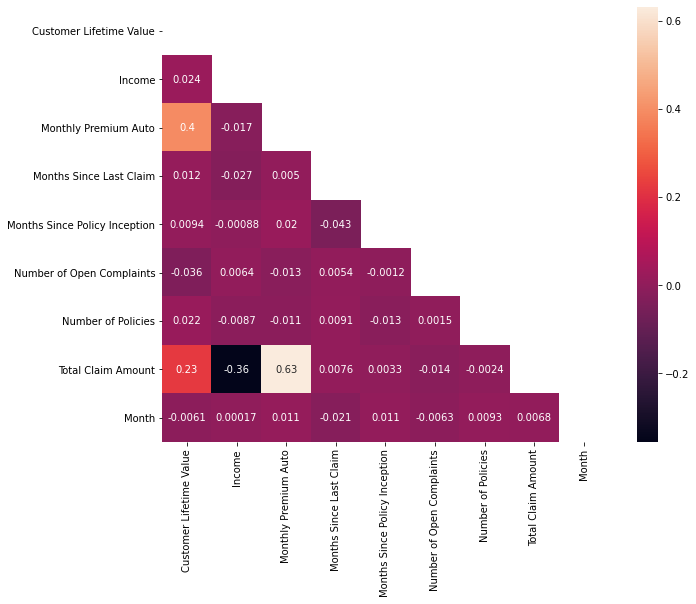

In [16]:
# check the correlations
mask = np.zeros_like(df.corr())

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

# from this you can remove multicolinearity > 0.9 with no worry...
## ... > 0.75 is better to check with the model metrics to be sure
### when removing, keep the ones that have the highest correlation with target

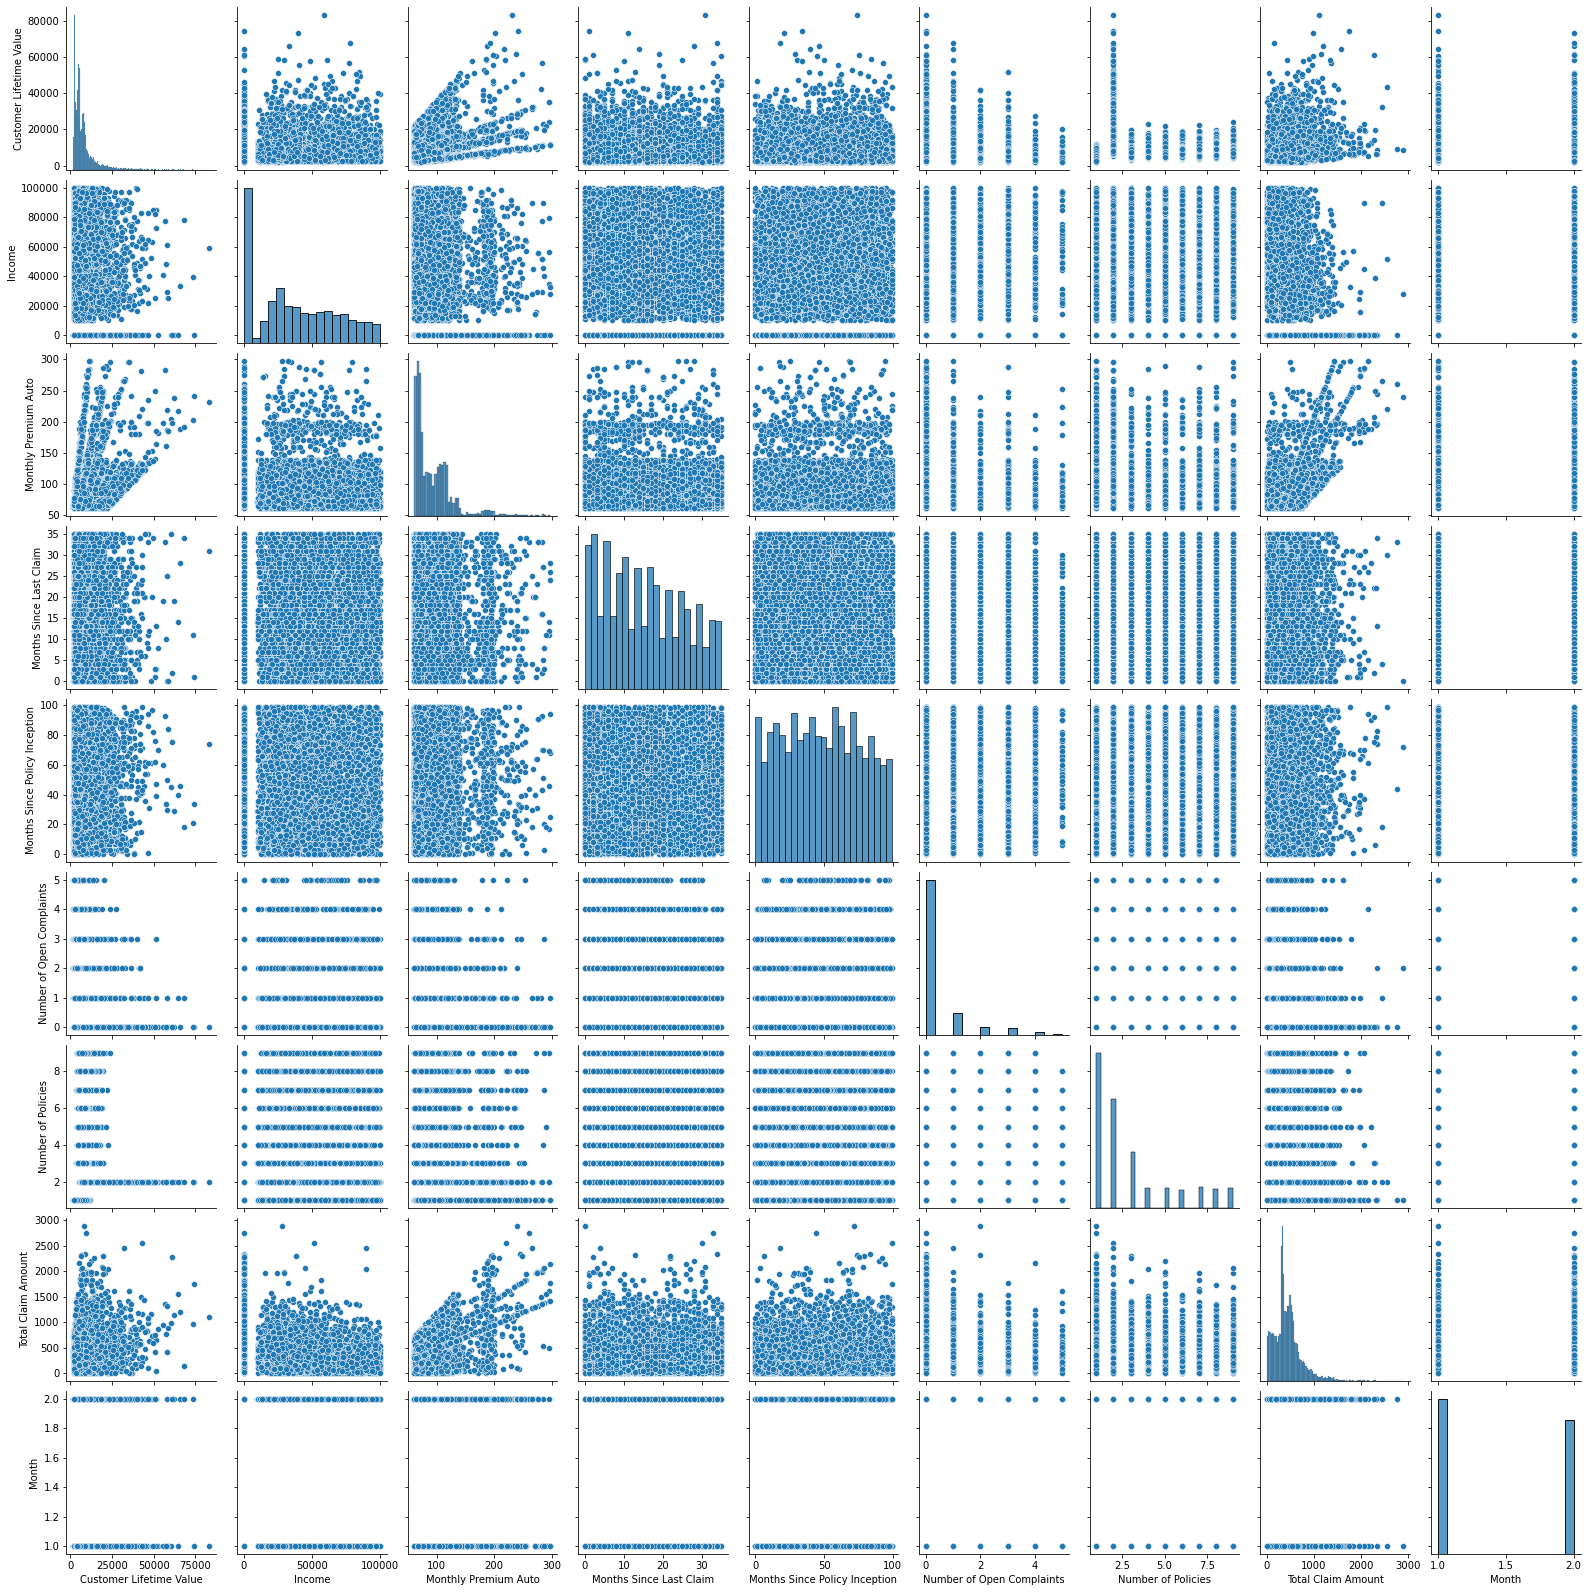

In [17]:
# covariance visualization
sns.pairplot(df)

In [31]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    #_ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        # transformed_data, ci = stats.boxcox(df[column])
        transformed_data = np.log(df[column])
        df[column] = transformed_data
        #_ci[column] = ci
    return df #, _ci

In [33]:
df = boxcox_transform(df)
df

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,-0.005341,No,Basic,Bachelor,2011-02-24,Employed,F,1.964206,Suburban,...,-1.258689,-1.351171,Corporate Auto,Corporate L3,Offer1,Agent,1.252074,Two-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
QZ44356,Arizona,0.013302,No,Extended,Bachelor,2011-01-31,Unemployed,F,1.954872,Suburban,...,-1.258689,-1.039243,Personal Auto,Personal L3,Offer3,Agent,1.394192,Four-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
AI49188,Nevada,0.022474,No,Premium,Bachelor,2011-02-19,Employed,F,1.951941,Suburban,...,-1.258689,-1.351171,Personal Auto,Personal L3,Offer1,Agent,1.305809,Two-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
WW63253,California,0.014803,No,Basic,Bachelor,2011-01-20,Unemployed,M,1.954872,Suburban,...,-1.258689,-1.171096,Corporate Auto,Corporate L2,Offer1,Call Center,1.296772,SUV,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
HB64268,Washington,-0.004912,No,Basic,Bachelor,2011-02-03,Employed,M,1.942710,Rural,...,-1.258689,-1.351171,Personal Auto,Personal L1,Offer1,Agent,1.089738,Four-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,0.029595,No,Basic,Bachelor,2011-02-10,Employed,M,1.984898,Urban,...,-1.258689,-1.351171,Personal Auto,Personal L1,Offer2,Web,1.150818,Four-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
PK87824,California,-0.002675,Yes,Extended,College,2011-02-12,Employed,F,1.879147,Suburban,...,-1.258689,-1.351171,Corporate Auto,Corporate L3,Offer1,Branch,1.249963,Four-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
TD14365,California,0.015851,No,Extended,Bachelor,2011-02-06,Unemployed,M,1.954872,Suburban,...,-1.818821,-1.351171,Corporate Auto,Corporate L2,Offer1,Branch,1.349564,Four-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...


In [34]:
def remove_outliers(df, threshold=1.5, in_columns=[], skip_columns=[]):
    if len(in_columns) == 0:
        in_columns = df.select_dtypes(np.number).columns
    for column in in_columns:
        if column not in skip_columns:
            print(column)
            print(len(df))
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            print(upper_limit, lower_limit)
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [36]:
df1 = df.copy()

df1 = remove_outliers(df1, threshold=1.5, skip_columns=['Monthly Premium Auto','Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Month']) 

df1

Customer Lifetime Value
9134
0.038928645588236555 -0.01875139878675053
Income
9130
2.050295198449069 1.8437896828980984
Total Claim Amount
8893
1.4548005035196239 1.0450303996972679


,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,-0.005341,No,Basic,Bachelor,2011-02-24,Employed,F,1.964206,Suburban,...,-1.258689,-1.351171,Corporate Auto,Corporate L3,Offer1,Agent,1.252074,Two-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
QZ44356,Arizona,0.013302,No,Extended,Bachelor,2011-01-31,Unemployed,F,1.954872,Suburban,...,-1.258689,-1.039243,Personal Auto,Personal L3,Offer3,Agent,1.394192,Four-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
AI49188,Nevada,0.022474,No,Premium,Bachelor,2011-02-19,Employed,F,1.951941,Suburban,...,-1.258689,-1.351171,Personal Auto,Personal L3,Offer1,Agent,1.305809,Two-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
WW63253,California,0.014803,No,Basic,Bachelor,2011-01-20,Unemployed,M,1.954872,Suburban,...,-1.258689,-1.171096,Corporate Auto,Corporate L2,Offer1,Call Center,1.296772,SUV,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
HB64268,Washington,-0.004912,No,Basic,Bachelor,2011-02-03,Employed,M,1.942710,Rural,...,-1.258689,-1.351171,Personal Auto,Personal L1,Offer1,Agent,1.089738,Four-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,0.029595,No,Basic,Bachelor,2011-02-10,Employed,M,1.984898,Urban,...,-1.258689,-1.351171,Personal Auto,Personal L1,Offer2,Web,1.150818,Four-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
PK87824,California,-0.002675,Yes,Extended,College,2011-02-12,Employed,F,1.879147,Suburban,...,-1.258689,-1.351171,Corporate Auto,Corporate L3,Offer1,Branch,1.249963,Four-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...
TD14365,California,0.015851,No,Extended,Bachelor,2011-02-06,Unemployed,M,1.954872,Suburban,...,-1.818821,-1.351171,Corporate Auto,Corporate L2,Offer1,Branch,1.349564,Four-Door Car,Medsize,Customer\nBU79786 2\nQZ44356 1\nAI49188 ...


In [22]:
df2 = remove_outliers(df1, threshold=1.5, in_columns=['Total Claim Amount', 'Income', 'Customer Lifetime Value'])
df2

Total Claim Amount
8527
54.699344535828956 13.162051776642972
Income
8227
1920.2166291572948 304.8513612844996
Customer Lifetime Value
8227
2.8246204767371896 2.666302301897561


,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,Location Code,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Month
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2.703839,No,Basic,Bachelor,2011-02-24,Employed,F,1247.937066,Suburban,...,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,33.035752,Two-Door Car,Medsize,0.561741
AI49188,Nevada,2.780772,No,Premium,Bachelor,2011-02-19,Employed,F,1144.063081,Suburban,...,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,40.071789,Two-Door Car,Medsize,0.561741
WW63253,California,2.759125,No,Basic,Bachelor,2011-01-20,Unemployed,M,1167.961720,Suburban,...,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,38.763252,SUV,Medsize,0.000000
HB64268,Washington,2.704995,No,Basic,Bachelor,2011-02-03,Employed,M,1072.375744,Rural,...,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.560154,Four-Door Car,Medsize,0.561741
OC83172,Oregon,2.762560,Yes,Basic,Bachelor,2011-01-25,Employed,F,1335.183381,Rural,...,0.648045,0.607328,Personal Auto,Personal L3,Offer2,Web,21.074537,Two-Door Car,Medsize,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,2.801170,No,Basic,Bachelor,2011-02-10,Employed,M,1448.531450,Urban,...,0.648045,0.607328,Personal Auto,Personal L1,Offer2,Web,23.588905,Four-Door Car,Medsize,0.561741
PK87824,California,2.711030,Yes,Extended,College,2011-02-12,Employed,F,697.790558,Suburban,...,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,32.792951,Four-Door Car,Medsize,0.561741
TD14365,California,2.762062,No,Extended,Bachelor,2011-02-06,Unemployed,M,1167.961720,Suburban,...,1.176115,0.607328,Corporate Auto,Corporate L2,Offer1,Branch,47.263726,Four-Door Car,Medsize,0.561741


In [43]:
df.dtypes

Customer Lifetime Value                   float64
Effective To Date                  datetime64[ns]
Income                                    float64
Monthly Premium Auto                      float64
Months Since Last Claim                   float64
Months Since Policy Inception             float64
Number of Open Complaints                 float64
Number of Policies                        float64
Total Claim Amount                        float64
Month                                     float64
State_California                            uint8
State_Nevada                                uint8
State_Oregon                                uint8
State_Washington                            uint8
Response_Yes                                uint8
Coverage_Extended                           uint8
Coverage_Premium                            uint8
Education_College                           uint8
Education_Doctor                            uint8
Education_High School or Below              uint8


In [39]:
df = pd.get_dummies(df2, drop_first=True) # i'm lazy
df

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Month,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,2.703839,2011-02-24,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752,0.561741,...,0,0,0,0,0,0,0,1,1,0
AI49188,2.780772,2011-02-19,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789,0.561741,...,0,0,0,0,0,0,0,1,1,0
WW63253,2.759125,2011-01-20,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252,0.000000,...,0,1,0,0,0,1,0,0,1,0
HB64268,2.704995,2011-02-03,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154,0.561741,...,0,0,0,0,0,0,0,0,1,0
OC83172,2.762560,2011-01-25,1335.183381,0.685347,6.134207,34.462027,0.648045,0.607328,21.074537,0.000000,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,2.801170,2011-02-10,1448.531450,0.685461,7.347815,33.090025,0.648045,0.607328,23.588905,0.561741,...,0,0,1,0,0,0,0,0,1,0
PK87824,2.711030,2011-02-12,697.790558,0.685606,6.134207,13.709541,0.648045,0.000000,32.792951,0.561741,...,1,0,0,0,0,0,0,0,1,0
TD14365,2.762062,2011-02-06,1167.961720,0.685725,4.379465,17.034934,1.176115,0.607328,47.263726,0.561741,...,1,0,0,0,0,0,0,0,1,0


In [44]:
X = df.drop(columns =['Total Claim Amount', 'Effective To Date'], axis=1)
y = df['Total Claim Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#selecting dtypes categorical and numerical
numerical = df.copy()
y = numerical['Total Claim Amount']
numerical = df.select_dtypes(include=[np.number]).drop(['Total Claim Amount'], axis =1)
X = numerical
categorical = df.select_dtypes(include=[np.object])

numerical

In [ ]:
categorical

In [ ]:
sns.distplot(df['Monthly Premium Auto'], bins=20)
plt.show()

In [ ]:
sns.distplot(df['Months Since Policy Inception'], bins=20)
plt.show()

In [ ]:
X = numerical # watch out, rookie mistake, don't use your target to train the model

lm = LinearRegression() # start the model object
model = lm.fit(X,y)

In [ ]:
sns.regplot(X['Monthly Premium Auto'], y, line_kws={"color": "yellow"})

In [ ]:
correlations_matrix = numerical.corr()  # method='spearman'
correlations_matrix

In [ ]:
sns_plot = sns.heatmap(correlations_matrix, annot=True)
figure = sns_plot.get_figure()    

plt.show()

In [ ]:
#LAB 8 
X_num = numerical.select_dtypes(include = np.number)
X_cat = categorical.select_dtypes(include = np.object)
pd.get_dummies(X_cat) #drop_first=True

In [ ]:
# in case you need to use the encode somewhere else besides your notebook:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(X_cat)

encoded = encoder.transform(X_cat).toarray()
encoded # encoder.categories_

X = np.concatenate((X_num, encoded), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

In [ ]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

In [ ]:
numerical.describe()

In [ ]:
numerical_corr = df.corr()
numerical_corr

In [ ]:
numerical_corr.info()

In [ ]:
df[(df['Income'] > 0.8) | (df['Income'] < -0.8)][['Income', 'Total Claim Amount']] # filtering for some analysis

In [ ]:
sns.distplot(x=df['Income']) # whis is the parameter to choose your threshold, standard is 1.5
plt.show()

In [ ]:
df1 = df.copy()

log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN

df1['Income'] = df1['Income'].apply(log_lmbda)

df1['Income'] = df1['Income'].fillna(np.mean(df1['Income']))

sns.distplot(df1['Income'])
plt.show()

In [ ]:
transformer = Normalizer() # Normalizer works column wise, so don't use it on the target 
# (X-y split comes first, or else your features will carry information from the target)
transformer.fit(X_num) # you'll always only fit on the trainning data

# When Normalizing with encoded categorical data, you'll lose some information on the categories.
# When Normalizing only numericals, you'll be losing proportion between numericals and encoded categories.

x_normalized = transformer.transform(X_num)
#pd.DataFrame(x_normalized)
x_normalized.shape

In [ ]:
sns.distplot(x_normalized.T[1])
plt.show()